In [1]:
import warnings
warnings.filterwarnings('ignore')

import torch
import linear_rep_geometry as lrg

device = torch.device("cuda:0")

concept_gamma = torch.load('matrices/concept_gamma.pt').to(device)
concept_g = torch.load('matrices/concept_g.pt').to(device)
sqrt_Cov_gamma = torch.load("matrices/sqrt_Cov_gamma.pt").to(device)
g = torch.load('matrices/g.pt').to(device)
W, d = g.shape

concept_names = []
with open('matrices/concept_names.txt', 'r') as f:
    for index, line in enumerate(f.readlines()):
        concept_names.append(f"{line.strip()} ({index +1})")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
# compute the inner product between concept directions
from torch.nn.functional import cosine_similarity
gamma_cosines = concept_gamma @ concept_gamma.T
g_cosines = concept_g @ concept_g.T

torch.manual_seed(100)
another_g = concept_gamma @ torch.abs(torch.randn(d,d)).to(device)
another_g_cosines = cosine_similarity(another_g.unsqueeze(1), another_g.unsqueeze(0), dim=-1)

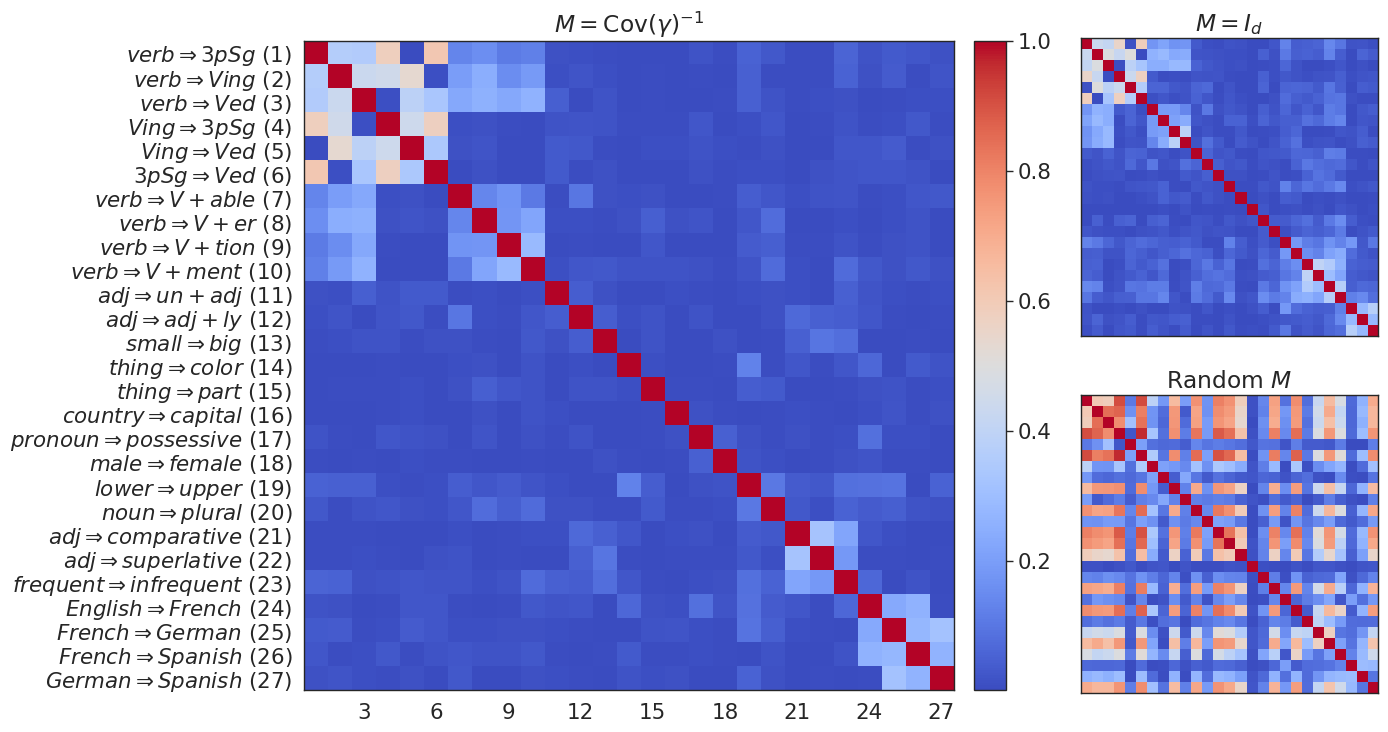

In [3]:
lrg.draw_heatmaps([torch.abs(g_cosines).cpu().numpy(),
                    torch.abs(gamma_cosines).cpu().numpy(),
                    torch.abs(another_g_cosines).cpu().numpy()],
                    concept_labels = concept_names,
                    cmap = "coolwarm")